In [1]:
# In this notebook we create a classifier of wine quality using as predictor variables the number of words
# and polarity of the sentiment analysis
from __future__ import unicode_literals
from textblob import TextBlob
import pandas as pd
import nltk

In [2]:
!pwd

/Users/luis/Desktop/tfm_folder


In [3]:
wine = pd.read_csv('/Users/luis/Desktop/tfm_folder/winemag-data_first150k.csv.zip',sep=",")

In [4]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
wine = wine.drop_duplicates()

In [6]:
wine= wine.dropna()

SENTIMENT ANALYSIS

In [7]:
first_description = wine.description[0]
print(first_description)
opinion_wine = TextBlob(first_description.decode('unicode-escape'))
print(opinion_wine.sentiment.polarity)
print(opinion_wine.sentiment.subjectivity)

This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.
0.224074074074
0.666666666667


In [8]:
def polarity_function(review):#measures polarity of wine description
    opinion_wine=TextBlob(review.decode('unicode-escape'))
    return opinion_wine.sentiment.polarity

def subjectivity_function(review): #measures subjectivity of wine description
    opinion_wine=TextBlob(review.decode('unicode-escape'))
    return opinion_wine.sentiment.subjectivity

def words_function(review): # measures the length of the wine description by number of words
    t=TextBlob(review.decode('unicode-escape'))
    return len(t.words)

In [9]:
wine['polarity']= wine.description.apply(polarity_function)

In [10]:
wine['num_words'] = wine.description.apply(words_function)

In [11]:
def rating_type(score):
    if score > 92:
        return 1
    if score <= 84:
        return 0
    if score>84 and score<=92:
        return 2


wine['quality'] = wine.points.apply(rating_type)

In [12]:
wine['quality'].value_counts()

2    28612
0     5763
1     4866
Name: quality, dtype: int64

In [13]:
wine_f = wine[['num_words','polarity','quality']]

In [14]:
wine_f = wine_f[wine_f.quality.isin([0,1])==True]

In [16]:
wine_f.head()

,num_words,polarity,quality
0,60,0.224074,1
2,47,0.137500,1
3,63,0.105195,1
8,43,0.300000,1
9,45,0.212000,1


In [17]:
len(wine_f)

10629

In [19]:
wine_f.groupby("quality").num_words.mean()
# here we see how the two quality categories differ in terms of average number of words
# in the review

quality
0    28.008503
1    56.231607
Name: num_words, dtype: float64

In [21]:
wine_f.groupby("quality").polarity.mean()
# here we see how the two quality categories differ in terms of average polarity
# of the review

quality
0    0.081509
1    0.219400
Name: polarity, dtype: float64

In [22]:
wine_f.quality.value_counts()

0    5763
1    4866
Name: quality, dtype: int64

In [23]:
X = wine_f[['polarity','num_words']]
X_frame = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X=X_frame.values

In [24]:
y = wine_f['quality']

In [25]:
df = wine_f[['num_words','polarity','quality']]

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

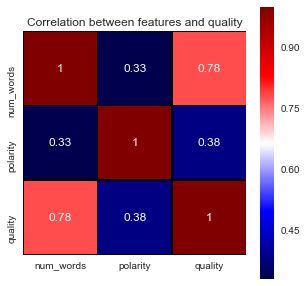

In [27]:
# correlation matrix in a nice visualization
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Correlation between features and quality')
# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="seismic", linecolor='black', annot=True)
plt.show()

In [28]:
# the number of words and polarity have high correlation with quality category

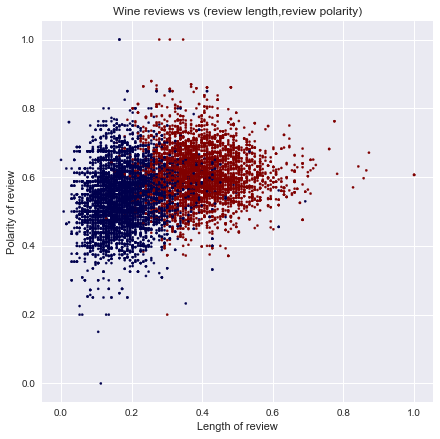

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(X_frame["num_words"],X_frame["polarity"],c=wine_f["quality"],s=5,alpha=1.0,cmap= "seismic")
plt.xlabel('Length of review')
plt.ylabel('Polarity of review')
plt.title('Wine reviews vs (review length,review polarity)')
plt.show()

In [31]:
# red (blue) points are high (low) quality wines

In [32]:
# logistic regression classifier

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf_lr = LogisticRegression()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [37]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [39]:
accuracy_score(clf_lr.predict(X),y)

0.91146862357700631

In [40]:
import numpy as np

In [41]:
np.mean(cross_val_score(clf_lr,X,y,cv=50))*100

91.24287226917609

In [42]:
np.std(cross_val_score(clf_lr,X,y,cv=50))*100

3.9175693294928196

(array([ 4.,  1.,  3.,  8.,  3.,  9.,  8.,  6.,  4.,  4.]),
 array([ 0.83018868,  0.84528302,  0.86037736,  0.8754717 ,  0.89056604,
         0.90566038,  0.92075472,  0.93584906,  0.9509434 ,  0.96603774,
         0.98113208]),
 <a list of 10 Patch objects>)

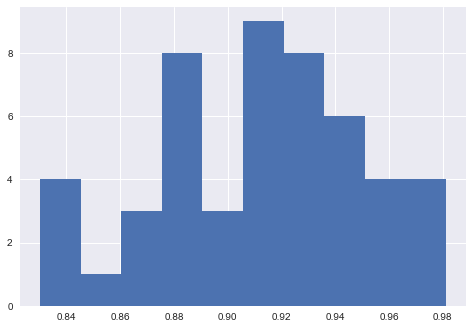

In [43]:
plt.hist(cross_val_score(clf_lr,X,y,cv=50))

In [44]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix

In [45]:
precision_score(clf_lr.predict(X_test),y_test)

0.9065040650406504

In [46]:
recall_score(clf_lr.predict(X_test),y_test)

0.91769547325102885

In [47]:
dfmat = confusion_matrix(y_test,clf_lr.predict(X_test))

In [48]:
dfmat

array([[1062,   80],
       [  92,  892]])

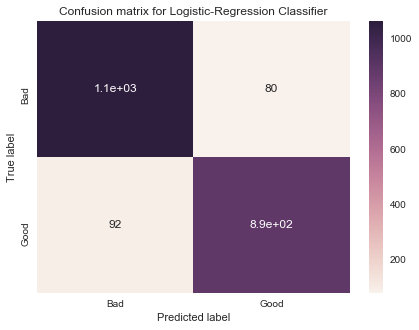

In [49]:
import seaborn as sns
plt.figure(figsize=(7,5))
dfmat = pd.DataFrame(dfmat,index = ["Bad","Good"],
                  columns = ["Bad","Good"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic-Regression Classifier')
plt.show()

/Users/luis/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.967699881931


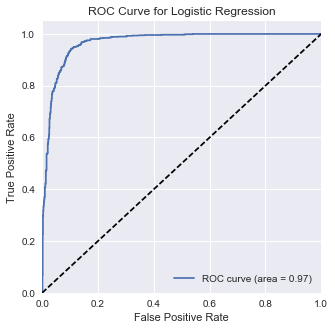

In [50]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
clf_lr.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

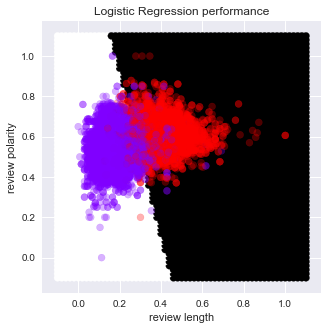

In [51]:
# comparing the prediction of the algorithm with the actual data in a grid
h = .02
x_min, x_max = X[:, 1].min() - 0.1, X[:, 1].max() + .1
y_min, y_max = X[:, 0].min() - .1, X[:, 0].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_lr.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,1],X[:,0],c=y,cmap="rainbow",alpha=0.3)
plt.xlabel('review length')
plt.ylabel('review polarity')
plt.title('Logistic Regression performance')
plt.show()

In [52]:
# k-nearest-neighbor classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
clf_knn = KNeighborsClassifier()

In [55]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [56]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
# finding the most suitable number of neighbors

In [60]:
acc_list=[]
for n in range(1,30):
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(X_train,y_train)
    mean_acc = np.mean(cross_val_score(clf_knn,X_test,y_test,cv=50))*100
    acc_list.append(mean_acc)

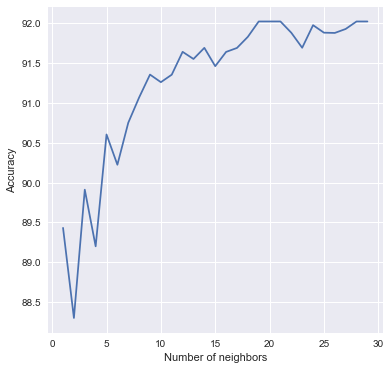

In [61]:
plt.figure(figsize=(6,6))
plt.plot(range(1,30),acc_list)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [62]:
clf_knn = KNeighborsClassifier(n_neighbors=20)

In [63]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [65]:
accuracy_score(clf_knn.predict(X_test),y_test)

0.9223894637817498

In [64]:
precision_score(clf_knn.predict(X_test),y_test)

0.92682926829268297

In [66]:
recall_score(clf_knn.predict(X_test),y_test)

0.90746268656716422

In [67]:
confusion_matrix(clf_knn.predict(X_test),y_test)

array([[1049,   72],
       [  93,  912]])

0.964987144375


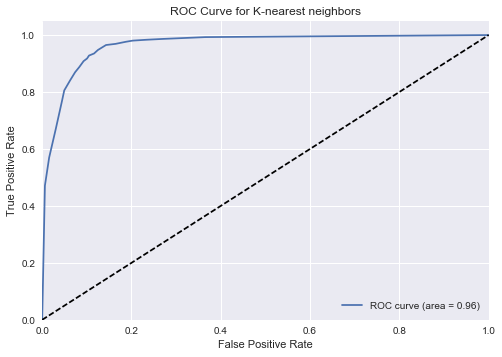

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
clf_knn.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_knn.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-nearest neighbors')
plt.legend(loc="lower right")
plt.show()

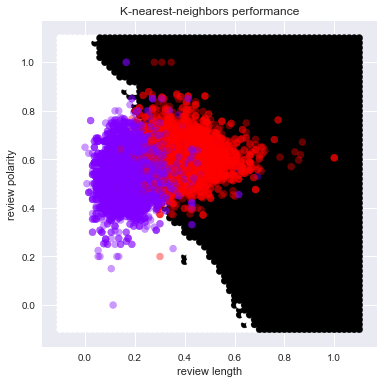

In [69]:
h = .02
x_min, x_max = X[:, 1].min() - 0.1, X[:, 1].max() + .1
y_min, y_max = X[:, 0].min() - .1, X[:, 0].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,1],X[:,0],c=y,cmap="rainbow",alpha=.4)
plt.xlabel('review length')
plt.ylabel('review polarity')
plt.title('K-nearest-neighbors performance')
plt.show()

In [70]:
# Random forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
clf_rf = RandomForestClassifier(oob_score=True,random_state=42)

In [74]:
clf_rf.fit(X_train,y_train)

/Users/luis/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luis/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [75]:
clf_rf.oob_score_

0.92873103610490415

In [76]:
clf_rf.feature_importances_

array([ 0.32899968,  0.67100032])

0.965320261017


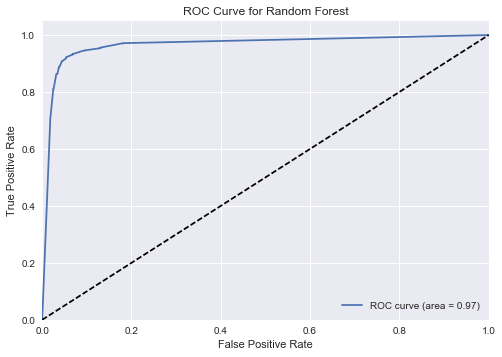

In [77]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
clf_rf.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [80]:
accuracy_score(clf_rf.predict(X_test),y_test)

0.93414863593603015

In [78]:
precision_score(clf_rf.predict(X_test),y_test)

0.90985324947589097

In [79]:
recall_score(clf_rf.predict(X_test),y_test)

0.9414316702819957

In [81]:
confusion_matrix(clf_rf.predict(X_test),y_test)

array([[1118,   86],
       [  54,  868]])

In [82]:
np.mean(cross_val_score(clf_rf,X_test,y_test,cv=50))*100

90.443269908386185

In [83]:
np.std(cross_val_score(clf_rf,X_test,y_test,cv=50))*100

3.7205857768334143

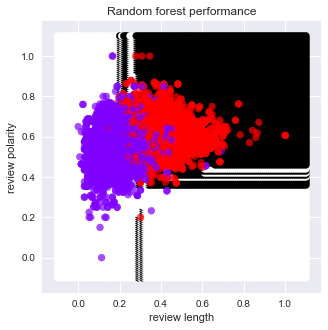

In [84]:
h=0.01
y_min, y_max = X[:, 0].min() - .1, X[:, 0].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_rf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,1],X[:,0],c=y,cmap="rainbow",alpha=0.7)
plt.xlabel('review length')
plt.ylabel('review polarity')
plt.title('Random forest performance')
plt.show()

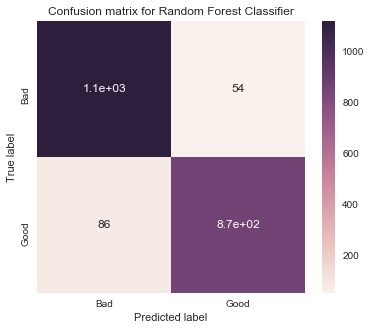

In [85]:
dfmat = confusion_matrix(y_test,clf_rf.predict(X_test))
import seaborn as sns
plt.figure(figsize=(6,5))
dfmat = pd.DataFrame(dfmat,index = ["Bad","Good"],
                  columns = ["Bad","Good"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()